In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv("votegetters_withratios.csv")
data.columns = [c.replace(' ', '_') for c in data.columns]

share = np.array(data.Share)

show = data.loc[0:,'G':'WS/48']
show = pd.concat([show, data['Win_Ratio']], 1)
show

,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Win_Ratio
0,82,38.3,24.8,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,0.731707
1,78,36.1,26.9,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,0.719512
2,78,37.6,33.1,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,0.500000
3,82,36.0,21.3,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,0.743902
4,80,35.8,14.1,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,0.743902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,65,36.4,22.2,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,0.472222
681,58,32.4,14.3,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,0.680556
682,44,36.6,24.6,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,0.704545
683,45,33.4,25.0,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,0.583333


In [151]:
#OLS
X = data.loc[0:,'G':'WS/48']
X = pd.concat([X, data['Win_Ratio']], 1)
X = X.to_numpy()
X = np.nan_to_num(X, copy=True, nan=0.0, posinf=None, neginf=None)

model = sm.OLS(share, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.653
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              97.14
Date:                Tue, 31 May 2022   Prob (F-statistic):                   1.35e-144
Time:                        09:07:03   Log-Likelihood:                          209.16
No. Observations:                 685   AIC:                                     -392.3
Df Residuals:                     672   BIC:                                     -333.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0050      0.001     -3.747      0.000      -0.008      -0.002
x2            -0.0138      0.003     -4.974      0.000      -0.019      -0.008
x3             0.0172      0.002      9.217      0.000       0.014       0.021
x4             0.0143      0.003      4.137      0.000       0.008       0.021
x5             0.0214      0.004      5.979      0.000       0.014       0.028
x6            -0.0044      0.015     -0.288      0.774      -0.035       0.026
x7             0.0133      0.011      1.204      0.229      -0.008       0.035
x8            -0.4304      0.193     -2.234      0.026      -0.809      -0.052
x9            -0.0848      0.057     -1.489      0.137      -0.197       0.027
x10           -0.0793      0.106     -0.746      0.456      -0.288       0.130
x11            0.0561      0.008      7.153      0.000       0.041       0.071
x12           -1.4651      0.562     -2.606      0.009      -2.569      -0.361
x13            0.6435      0.076      8.424      0.000       0.493       0.793
==============================================================================
Omnibus:                       84.878   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.430
Skew:                           0.907   Prob(JB):                     3.16e-26
Kurtosis:                       3.909   Cond. No.                     7.38e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
#drop bottom
data2 = data[data['Share'] > 0.01]

share2 = np.array(data2.Share)

X2 = data2.loc[0:,'G':'WS/48']
X2 = pd.concat([X2, data2['Win_Ratio']], 1)
X2 = X2.to_numpy()
X2 = np.nan_to_num(X2, copy=True, nan=0.0, posinf=None, neginf=None)

model2 = sm.OLS(share2, X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              96.66
Date:                Tue, 31 May 2022   Prob (F-statistic):                   1.36e-113
Time:                        01:07:40   Log-Likelihood:                          94.322
No. Observations:                 406   AIC:                                     -162.6
Df Residuals:                     393   BIC:                                     -110.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0106      0.002     -5.172      0.000      -0.015      -0.007
x2            -0.0151      0.004     -3.795      0.000      -0.023      -0.007
x3             0.0226      0.003      8.046      0.000       0.017       0.028
x4             0.0196      0.005      3.943      0.000       0.010       0.029
x5             0.0310      0.005      5.982      0.000       0.021       0.041
x6            -0.0213      0.021     -1.015      0.311      -0.063       0.020
x7            -0.0022      0.016     -0.138      0.890      -0.033       0.028
x8            -0.6127      0.284     -2.158      0.032      -1.171      -0.054
x9            -0.2648      0.094     -2.812      0.005      -0.450      -0.080
x10           -0.0872      0.146     -0.596      0.552      -0.375       0.201
x11            0.0771      0.011      7.088      0.000       0.056       0.099
x12           -2.1363      0.782     -2.730      0.007      -3.675      -0.598
x13            1.1515      0.122      9.423      0.000       0.911       1.392
==============================================================================
Omnibus:                       19.047   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.400
Skew:                           0.533   Prob(JB):                     3.72e-05
Kurtosis:                       3.262   Cond. No.                     7.45e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
#sigmoid
y = np.log(share) - np.log(1.001 - share)

model_sig = sm.OLS(y, X).fit()
model_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              288.1
Date:                Tue, 31 May 2022   Prob (F-statistic):                   1.89e-264
Time:                        01:07:42   Log-Likelihood:                         -1337.8
No. Observations:                 685   AIC:                                      2702.
Df Residuals:                     672   BIC:                                      2760.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0775      0.013     -6.021      0.000      -0.103      -0.052
x2            -0.2197      0.027     -8.277      0.000      -0.272      -0.168
x3             0.2275      0.018     12.736      0.000       0.192       0.263
x4             0.1671      0.033      5.054      0.000       0.102       0.232
x5             0.2772      0.034      8.094      0.000       0.210       0.344
x6             0.0593      0.147      0.403      0.687      -0.230       0.349
x7             0.2241      0.106      2.114      0.035       0.016       0.432
x8            -5.4914      1.843     -2.979      0.003      -9.110      -1.872
x9            -1.6590      0.545     -3.045      0.002      -2.729      -0.589
x10           -2.4703      1.017     -2.428      0.015      -4.468      -0.472
x11            0.7789      0.075     10.382      0.000       0.632       0.926
x12          -26.0716      5.378     -4.848      0.000     -36.631     -15.512
x13            6.4180      0.731      8.782      0.000       4.983       7.853
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.596
Skew:                           0.068   Prob(JB):                        0.742
Kurtosis:                       2.950   Cond. No.                     7.38e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

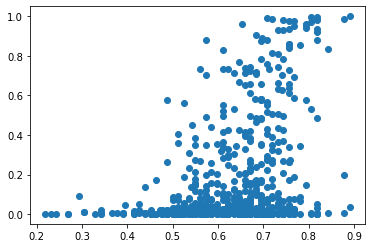

In [149]:
#logistic shape
Win_Ratio = np.array(data.Win_Ratio)
plt.scatter(Win_Ratio, share)

In [146]:
#drop top and bottom
data3 = data2[data2['Share'] < 0.99]

share3 = np.array(data3.Share)

X3 = data3.loc[0:,'G':'WS/48']
X3 = pd.concat([X3, data3['Win_Ratio']], 1)
X3 = X3.to_numpy()
X3 = np.nan_to_num(X3, copy=True, nan=0.0, posinf=None, neginf=None)

model3 = sm.OLS(share3, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              89.25
Date:                Tue, 31 May 2022   Prob (F-statistic):                   5.66e-108
Time:                        01:13:21   Log-Likelihood:                          94.008
No. Observations:                 402   AIC:                                     -162.0
Df Residuals:                     389   BIC:                                     -110.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0103      0.002     -5.030      0.000      -0.014      -0.006
x2            -0.0148      0.004     -3.699      0.000      -0.023      -0.007
x3             0.0226      0.003      8.005      0.000       0.017       0.028
x4             0.0190      0.005      3.813      0.000       0.009       0.029
x5             0.0307      0.005      5.917      0.000       0.021       0.041
x6            -0.0215      0.021     -1.016      0.310      -0.063       0.020
x7            -0.0015      0.016     -0.098      0.922      -0.032       0.029
x8            -0.6121      0.284     -2.154      0.032      -1.171      -0.053
x9            -0.2695      0.094     -2.856      0.005      -0.455      -0.084
x10           -0.0861      0.148     -0.583      0.560      -0.376       0.204
x11            0.0749      0.011      6.858      0.000       0.053       0.096
x12           -2.0747      0.782     -2.652      0.008      -3.613      -0.536
x13            1.1286      0.123      9.163      0.000       0.886       1.371
==============================================================================
Omnibus:                       21.624   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.573
Skew:                           0.573   Prob(JB):                     7.61e-06
Kurtosis:                       3.304   Cond. No.                     7.41e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""